In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
sns.set()

In [5]:
df=pd.read_csv("train-HR.csv")
df.index = df.EmployeeNumber
df.head()
print("Shape: ", df.shape)
#df.columns

Shape:  (1322, 32)


In [6]:
predictor = df[['Age', 'Gender', 'Department', 'JobRole', 'JobLevel',
       'JobSatisfaction', 'JobInvolvement', 'PerformanceRating', 'OverTime',
       'EnvironmentSatisfaction', 'EducationField', 'Education',
       'BusinessTravel', 'WorkLifeBalance', 'MaritalStatus',
       'RelationshipSatisfaction', 'DistanceFromHome', 'StockOptionLevel',
       'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'DailyRate', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'PercentSalaryHike']]

target = df['Attrition']
predictor.shape

(1322, 30)

In [7]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(predictor, target,test_size=0.2,random_state=0)
print("Shape of training data: ",train_x.shape)
print("Shape of test data: ",train_y.shape)


'''
train_x = predictor 80%
test_x predictor 20%

train_y = target 80%
test_y = target 20%
'''

Shape of training data:  (1057, 30)
Shape of test data:  (1057,)


'\ntrain_x = predictor 80%\ntest_x predictor 20%\n\ntrain_y = target 80%\ntest_y = target 20%\n'

### Finding optimal K-value using elbow curve

In [8]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i = knn.predict(test_x)
    error = np.mean(pred_i != test_y)
    error_rate.append(error)
    
    print("k = ", i, " error = ", error)
    

k =  1  error =  0.2490566037735849
k =  2  error =  0.1811320754716981
k =  3  error =  0.2037735849056604
k =  4  error =  0.16226415094339622
k =  5  error =  0.16981132075471697
k =  6  error =  0.15849056603773584
k =  7  error =  0.16226415094339622
k =  8  error =  0.16226415094339622
k =  9  error =  0.16981132075471697
k =  10  error =  0.15849056603773584
k =  11  error =  0.15849056603773584
k =  12  error =  0.16226415094339622
k =  13  error =  0.16226415094339622
k =  14  error =  0.16226415094339622
k =  15  error =  0.16226415094339622
k =  16  error =  0.16226415094339622
k =  17  error =  0.16226415094339622
k =  18  error =  0.15849056603773584
k =  19  error =  0.15849056603773584
k =  20  error =  0.15849056603773584
k =  21  error =  0.15849056603773584
k =  22  error =  0.15849056603773584
k =  23  error =  0.15849056603773584
k =  24  error =  0.15849056603773584
k =  25  error =  0.15849056603773584
k =  26  error =  0.15849056603773584
k =  27  error =  0.1584

Text(0, 0.5, 'Error Rate')

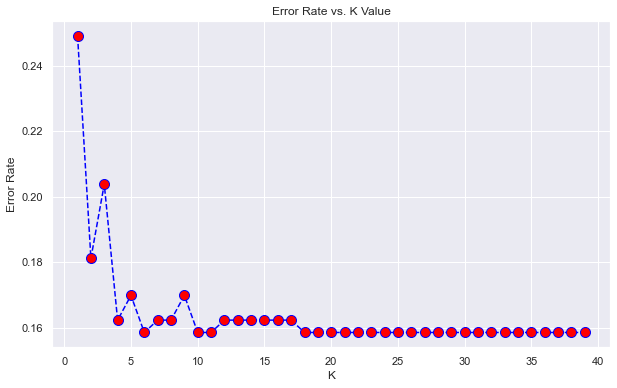

In [9]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Optimal K-value seems to be K=10

In [10]:

clf = Pipeline(steps=[('scalar', StandardScaler()),
                      ('classifier', KNeighborsClassifier(n_neighbors=11, metric='euclidean'))])
clf.fit(train_x,train_y)
predictions = clf.predict(train_x)
predict_test  = clf.predict(test_x)

print('RMSE on train data: ')
print(np.sqrt(np.mean(predictions- train_y)**2))
print('RMSE on test data: ')
print(np.sqrt(np.mean(predict_test- test_y)**2))


RMSE on train data: 
0.1466414380321665
RMSE on test data: 
0.15471698113207547


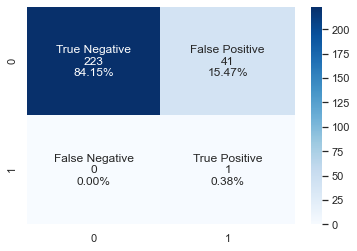

In [11]:
# For validation set

cf_matrix = confusion_matrix(predict_test, test_y)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [12]:
# For the validation set

# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(test_y, predict_test))

# Recall
from sklearn.metrics import recall_score
print("Recall: ",recall_score(test_y, predict_test, average=None)[0])

# Precision
from sklearn.metrics import precision_score
print("Precision: ",precision_score(test_y, predict_test, average=None)[0])

#F1-score
from sklearn.metrics import f1_score
print("F1 score: ",f1_score(test_y, predict_test, average=None)[0])

Accuracy:  0.8452830188679246
Recall:  1.0
Precision:  0.8446969696969697
F1 score:  0.9158110882956879


### Visualising KNN

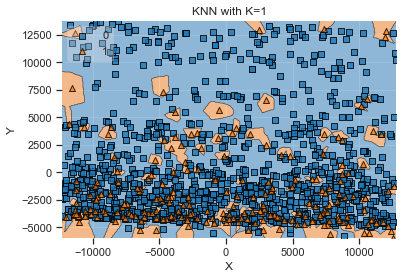

<Figure size 1440x864 with 0 Axes>

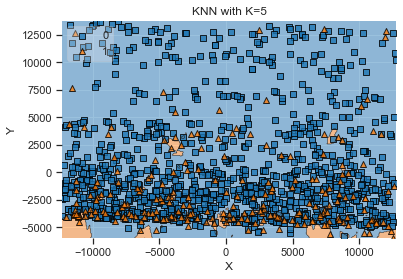

<Figure size 1440x864 with 0 Axes>

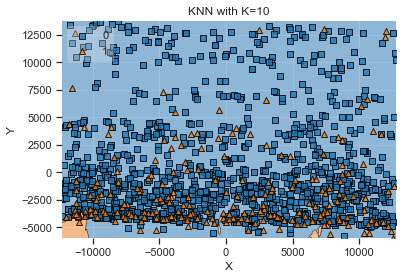

<Figure size 1440x864 with 0 Axes>

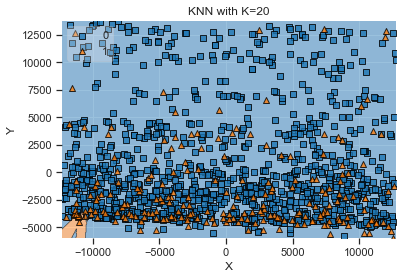

<Figure size 1440x864 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

def knn_comparison(data, k):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    pca = PCA(n_components = 2)
    X_train2 = pca.fit_transform(data[['Age', 'Gender', 'Department', 'JobRole', 'JobLevel',
       'JobSatisfaction', 'JobInvolvement', 'PerformanceRating', 'OverTime',
       'EnvironmentSatisfaction', 'EducationField', 'Education',
       'BusinessTravel', 'WorkLifeBalance', 'MaritalStatus',
       'RelationshipSatisfaction', 'DistanceFromHome', 'StockOptionLevel',
       'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'DailyRate', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'PercentSalaryHike']])
    clf.fit(X_train2, data['Attrition'])
    # Plotting decision region
    plot_decision_regions(X_train2, np.array(data['Attrition']), clf=clf, legend=2)
    # Adding axes annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('KNN with K='+ str(k))
    plt.figure(figsize=(20,12))
    plt.show()

for i in [1,5,10,20]:
    knn_comparison(df, i)

### Comments on the visualisation

Since data of such high dimensionality cannot be visualised, we attempted to reduce it to two dimensions using PCA. However, we realised that this 2 components represent only 21% of the data and hence the plots are not accurate.

However, from this we can draw that K=1 highly overfits the data and is not optimal. The decision boundary becomes smooter as K increases

### Testing the model

In [13]:
test_df=pd.read_csv("test-HR.csv")
test_df.index = test_df.EmployeeNumber
print("Shape",test_df.shape)
test_df.head()

test_predictor = test_df.drop(['EmployeeNumber','Attrition'],1)
test_target = test_df.Attrition
test_predictor

Shape (148, 32)


,Age,Gender,Department,JobRole,JobLevel,JobSatisfaction,JobInvolvement,PerformanceRating,OverTime,EnvironmentSatisfaction,...,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1857,46,1,2,5,3,4,3,3,0,4,...,4,9,8,4,7,706,82,8578,19989,14
1858,28,1,1,2,1,4,3,3,0,3,...,2,3,2,2,2,280,43,2706,10494,15
1859,29,1,2,1,2,3,1,3,0,4,...,3,7,0,1,6,726,93,6384,21143,17
1860,42,1,2,3,1,3,3,3,0,4,...,3,0,0,0,0,1142,81,3968,13624,13
1862,32,1,3,8,2,2,2,3,1,3,...,3,2,2,2,2,414,82,9907,26186,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,1,2,3,2,4,4,3,0,3,...,3,5,2,0,3,884,41,2571,12290,17
2062,39,1,2,1,3,1,2,3,0,4,...,5,7,7,1,7,613,42,9991,21457,15
2064,27,1,2,5,2,2,4,4,1,2,...,0,6,2,0,3,155,87,6142,5174,20


In [14]:
y_predict = clf.predict(test_predictor)

print('RMSE on train data: ')
print(np.sqrt(np.mean(y_predict- test_target)**2))

RMSE on train data: 
0.10810810810810811


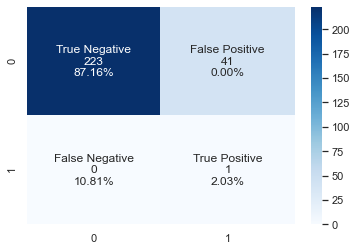

In [15]:
test_matrix = confusion_matrix(test_target, y_predict)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     test_matrix.flatten()/np.sum(test_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [16]:
# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(test_target, y_predict))

# Recall
from sklearn.metrics import recall_score
print("Recall: ",recall_score(test_target, y_predict, average=None)[0])

# Precision
from sklearn.metrics import precision_score
print("Precision: ",precision_score(test_target, y_predict, average=None)[0])

#F1-score
from sklearn.metrics import f1_score
print("F1 score: ",f1_score(test_target, y_predict, average=None)[0])

Accuracy:  0.8918918918918919
Recall:  1.0
Precision:  0.8896551724137931
F1 score:  0.9416058394160584


## Using values reduced by PCA to optimise the accuracy

K-nearest neighbour suffers from the curse of dimensionality. Hence, we are attemtping to run the model on the dataset that has been reduced from 30 components to 25 using PCA to check for any improvement in accuracy and reduce the overfitting of data.

Using PCA will have the follwing impacts:

a) Makes the training of the model faster.  
b) Leads to information loss; the independent variables become less interpretable

In [66]:
pca_train = pd.read_csv("../HR_Attrition_Project/pca-train-HR.csv")
pca_train.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.409064,0.160680,-1.716593,1.830294,1.016328,0.238033,2.718494,-0.895283,-0.162141,0.916786,...,-0.468599,-0.466730,1.122643,-0.882822,1.094624,1.638283,-0.242344,-0.792473,0.268079,-0.384488
1,0.563592,-1.146969,2.898770,0.670695,-0.050051,0.983238,-0.276628,-0.291559,1.551159,0.088934,...,0.992271,0.088657,-1.322833,-0.936052,0.377191,0.192314,-1.993617,0.239492,0.016443,0.654156
2,-2.479954,1.221133,-0.328731,0.879818,-1.236178,0.763653,-0.474335,1.489637,-1.725145,0.023501,...,-0.967976,1.441390,0.020097,-0.296363,-0.110701,1.489248,0.036140,0.113525,0.368877,-0.371208
3,-0.875964,-0.522983,-1.326795,-0.097936,-0.433541,1.434501,1.367728,1.079565,0.628383,1.816440,...,-1.156882,0.284579,-0.471482,-0.532564,-1.410697,-0.265560,0.175595,0.449356,-0.971498,0.295738
4,-1.850810,1.260646,-0.592262,-0.491348,-0.963587,-0.213744,-1.271774,0.146525,-0.389915,-0.247538,...,1.057911,-2.265619,0.187929,-0.714792,0.393703,2.191209,0.776645,-0.625789,0.266285,-0.373826


In [67]:
pca_train_x, pca_test_x, train_y, test_y = train_test_split(pca_train, target,test_size=0.2,random_state=0)
print("Shape of training data: ",pca_train_x.shape)
print("Shape of test data: ",train_y.shape)


Shape of training data:  (1057, 25)
Shape of test data:  (1057,)


### Elbow curve

In [68]:
error_pca = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(pca_train_x,train_y)
    pred_i = knn.predict(pca_test_x)
    error = np.mean(pred_i != test_y)
    error_pca.append(error)
    
    print("k = ", i, " error = ", error)

k =  1  error =  0.1660377358490566
k =  2  error =  0.1471698113207547
k =  3  error =  0.1471698113207547
k =  4  error =  0.1509433962264151
k =  5  error =  0.1471698113207547
k =  6  error =  0.15849056603773584
k =  7  error =  0.15471698113207547
k =  8  error =  0.15849056603773584
k =  9  error =  0.15471698113207547
k =  10  error =  0.15849056603773584
k =  11  error =  0.15471698113207547
k =  12  error =  0.15471698113207547
k =  13  error =  0.15471698113207547
k =  14  error =  0.15471698113207547
k =  15  error =  0.15471698113207547
k =  16  error =  0.15849056603773584
k =  17  error =  0.15849056603773584
k =  18  error =  0.15849056603773584
k =  19  error =  0.15849056603773584
k =  20  error =  0.15849056603773584
k =  21  error =  0.15849056603773584
k =  22  error =  0.15849056603773584
k =  23  error =  0.15849056603773584
k =  24  error =  0.15849056603773584
k =  25  error =  0.15849056603773584
k =  26  error =  0.15849056603773584
k =  27  error =  0.158490

Text(0, 0.5, 'Error Rate')

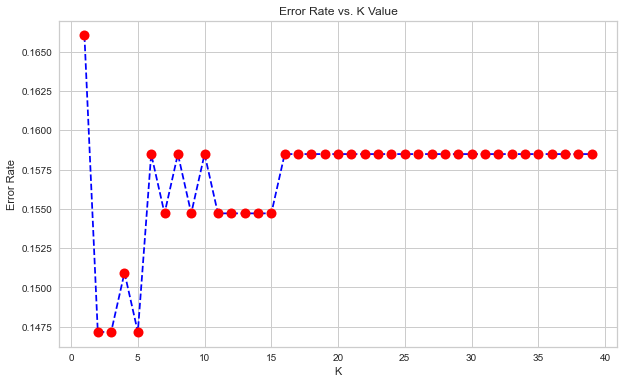

In [69]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_pca,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [85]:

clf = Pipeline(steps=[('scalar', StandardScaler()),
                      ('classifier', KNeighborsClassifier(n_neighbors=11, metric='euclidean'))])
clf.fit(pca_train_x,train_y)
predictions = clf.predict(pca_train_x)
predict_test  = clf.predict(pca_test_x)

print('RMSE on train data: ')
print(np.sqrt(np.mean(predictions- train_y)**2))
print('RMSE on test data: ')
print(np.sqrt(np.mean(predict_test- test_y)**2))


RMSE on train data: 
0.15515610217596973
RMSE on test data: 
0.15849056603773584


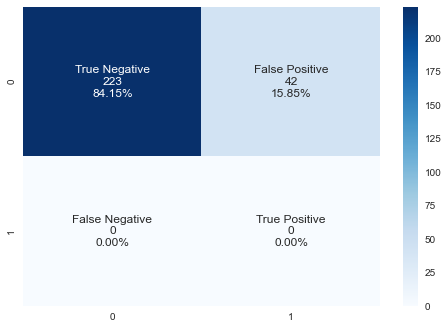

In [86]:
cf_matrix = confusion_matrix(predict_test, test_y)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap="Blues")

In [87]:
# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(test_y, predict_test))

# Recall
from sklearn.metrics import recall_score
print("Recall: ",recall_score(test_y, predict_test, average=None)[0])

# Precision
from sklearn.metrics import precision_score
print("Precision: ",precision_score(test_y, predict_test, average=None, labels=np.unique(predict_test))[0])

#F1-score
from sklearn.metrics import f1_score
print("F1 score: ",f1_score(test_y, predict_test, average=None, labels=np.unique(predict_test))[0])


Accuracy:  0.8415094339622642
Recall:  1.0
Precision:  0.8415094339622642
F1 score:  0.9139344262295083


In [88]:
test_pca=pd.read_csv("pca-test-HR.csv")
print("Shape of train data: ",test_pca.shape)
test_pca.head()

test_df=pd.read_csv("test-HR.csv")
test_pca_target = test_df.Attrition
print("Shape of test data: ",test_pca.shape)


Shape of train data:  (148, 25)
Shape of test data:  (148, 25)


In [89]:
y_pca_predict = clf.predict(test_pca)

print('RMSE on train data: ')
print(np.sqrt(np.mean(y_pca_predict- test_pca_target)**2))

RMSE on train data: 
0.10135135135135136


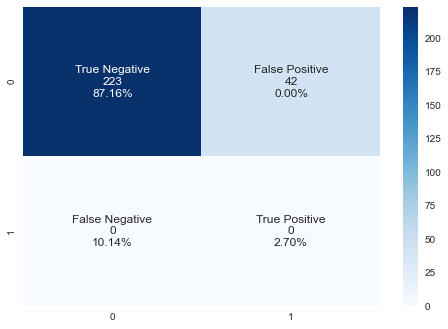

In [90]:
test_matrix = confusion_matrix(test_pca_target, y_pca_predict)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     test_matrix.flatten()/np.sum(test_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [91]:
# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(test_pca_target, y_pca_predict))

# Recall
from sklearn.metrics import recall_score
print("Recall: ",recall_score(test_pca_target, y_pca_predict, average=None)[0])

# Precision
from sklearn.metrics import precision_score
print("Precision: ",precision_score(test_pca_target, y_pca_predict, average=None)[0])

#F1-score
from sklearn.metrics import f1_score
print("F1 score: ",f1_score(test_pca_target, y_pca_predict, average=None)[0])

Accuracy:  0.8986486486486487
Recall:  1.0
Precision:  0.8958333333333334
F1 score:  0.945054945054945


### New PCA (last one hopefully ;)

In [146]:
wo_years = pd.read_csv("../HR_Attrition_Project/pca-wo-years-train-HR.csv")
years = pd.read_csv("../HR_Attrition_Project/pca-years-train-HR.csv")

final_df = pd.concat([wo_years, years], axis=1)
print(wo_years.shape)
print(years.shape)

final_df = final_df.drop(['EmployeeNumber','Unnamed: 0'],1)
final_df.shape

(1322, 25)
(1322, 4)


(1322, 27)

In [153]:
pca_years_train_x, pca_years_test_x, train_y, test_y = train_test_split(final_df, target,test_size=0.2,random_state=0)
print("Shape of training data: ",pca_years_train_x.shape)
print("Shape of test data: ",train_y.shape)

Shape of training data:  (1057, 27)
Shape of test data:  (1057,)


In [154]:
error_pca_years = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(pca_years_train_x,train_y)
    pred_i = knn.predict(pca_years_test_x)
    error = np.mean(pred_i != test_y)
    error_pca_years.append(error)
    
    print("k = ", i, " error = ", error)

k =  1  error =  0.2490566037735849
k =  2  error =  0.1811320754716981
k =  3  error =  0.2037735849056604
k =  4  error =  0.16226415094339622
k =  5  error =  0.16981132075471697
k =  6  error =  0.15849056603773584
k =  7  error =  0.16226415094339622
k =  8  error =  0.16226415094339622
k =  9  error =  0.16981132075471697
k =  10  error =  0.15849056603773584
k =  11  error =  0.15849056603773584
k =  12  error =  0.16226415094339622
k =  13  error =  0.16226415094339622
k =  14  error =  0.16226415094339622
k =  15  error =  0.16226415094339622
k =  16  error =  0.16226415094339622
k =  17  error =  0.16226415094339622
k =  18  error =  0.15849056603773584
k =  19  error =  0.15849056603773584
k =  20  error =  0.15849056603773584
k =  21  error =  0.15849056603773584
k =  22  error =  0.15849056603773584
k =  23  error =  0.15849056603773584
k =  24  error =  0.15849056603773584
k =  25  error =  0.15849056603773584
k =  26  error =  0.15849056603773584
k =  27  error =  0.1584

Text(0, 0.5, 'Error Rate')

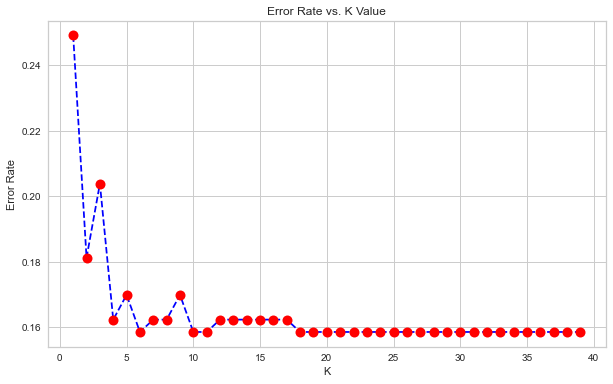

In [155]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_pca_years,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [157]:

clf = Pipeline(steps=[('scalar', StandardScaler()),
                      ('classifier', KNeighborsClassifier(n_neighbors=11, metric='euclidean'))])
clf.fit(pca_years_train_x,train_y)
predictions = clf.predict(pca_years_train_x)
predict_test  = clf.predict(pca_years_test_x)

print('RMSE on train data: ')
print(np.sqrt(np.mean(predictions- train_y)**2))
print('RMSE on test data: ')
print(np.sqrt(np.mean(predict_test- test_y)**2))


RMSE on train data: 
0.1532639545884579
RMSE on test data: 
0.15471698113207547
